In [60]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline 

In [61]:
np.random.seed(42)

# Number of samples
num_samples = 140

# Define features and their categories
features = ['hair_color', 'eye_color', 'skin_color']
hair_colors = ['blonde', 'brunette', 'red', 'black']
eye_colors = ['amber', 'gray', 'green', 'hazel']
skin_colors = ['fair', 'brown', 'dark']

# Generate synthetic data
data = pd.DataFrame({
    'hair_color': np.random.choice(hair_colors, size=num_samples),
    'eye_color': np.random.choice(eye_colors, size=num_samples),
    'skin_color': np.random.choice(skin_colors, size=num_samples)
})

# Display the first few rows of the synthetic data
print(data.head())

  hair_color eye_color skin_color
0        red     hazel      brown
1      black     amber       dark
2     blonde     hazel      brown
3        red     hazel       dark
4        red     hazel       fair


In [62]:
print(data.hair_color.value_counts())
print(data.eye_color.value_counts() )
print(data.skin_color.value_counts() )

black       41
brunette    36
blonde      32
red         31
Name: hair_color, dtype: int64
green    42
amber    36
hazel    35
gray     27
Name: eye_color, dtype: int64
fair     49
dark     47
brown    44
Name: skin_color, dtype: int64


In [63]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
data.hair_color = le.fit_transform(data.hair_color)
data.eye_color = le.fit_transform(data.eye_color)
data.skin_color = le.fit_transform(data.skin_color)

In [64]:
data.head()

,hair_color,eye_color,skin_color
0,3,3,0
1,0,0,1
2,1,3,0
3,3,3,1
4,3,3,2


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 288.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 288.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 288.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 288.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 288.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...


Run 1, iteration: 1/100, moves: 11, cost: 217.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 228.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 217.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 221.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 19, cost: 220.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 30, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 39, cost: 175.0
Init: initializing centroids
Init: in

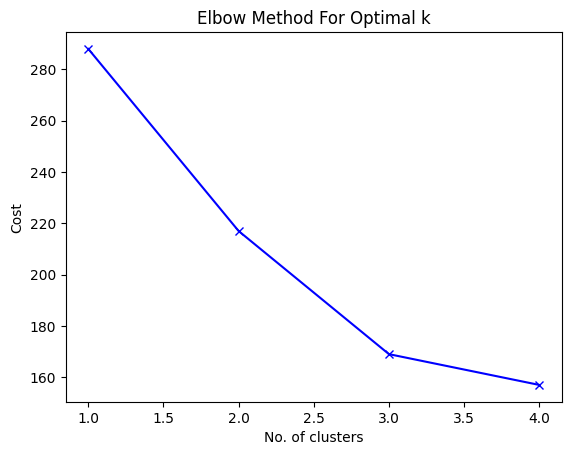

In [65]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
kmode = KModes(n_clusters=3, init = "random", n_init = 300)
clusters = kmode.fit_predict(data)

In [67]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.1505159094453138


In [68]:
data['cluster'] = clusters
print(data.head())

   hair_color  eye_color  skin_color  cluster
0           3          3           0        1
1           0          0           1        2
2           1          3           0        1
3           3          3           1        1
4           3          3           2        1


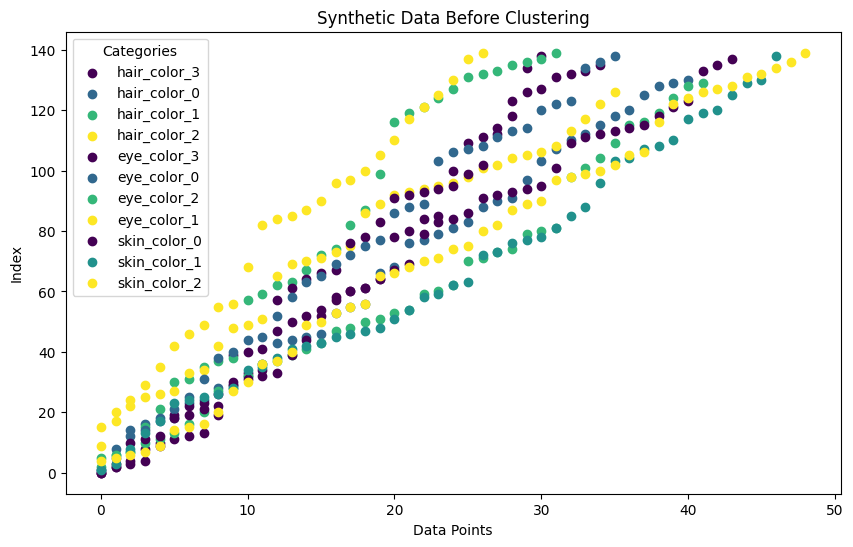

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for each category
for feature in features:
    unique_categories = data[feature].unique()
    color_map = plt.cm.get_cmap('viridis', len(unique_categories))

    for i, category in enumerate(unique_categories):
        category_data = data[data[feature] == category]
        ax.scatter(range(len(category_data)), category_data.index, label=f'{feature}_{category}', color=color_map(i))

ax.set_title('Synthetic Data Before Clustering')
ax.set_xlabel('Data Points')
ax.set_ylabel('Index')
ax.legend(title='Categories')
plt.show()

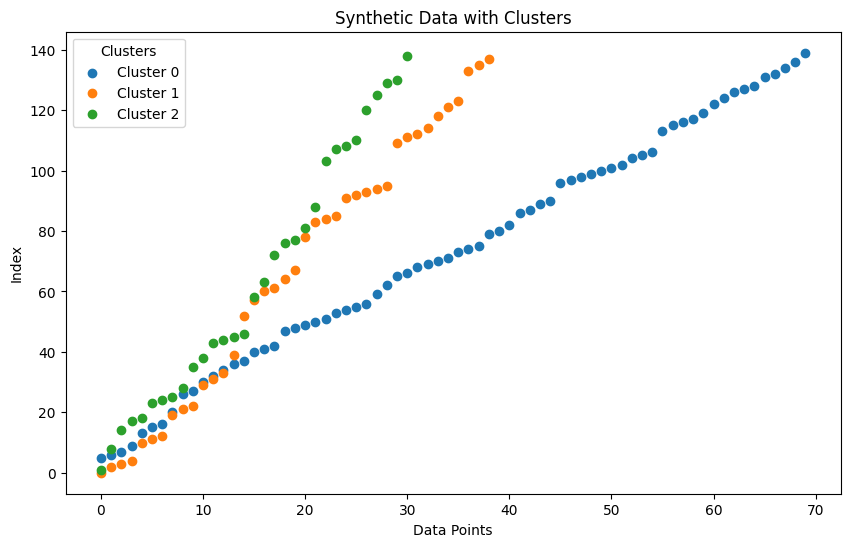

In [70]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in range(3):
    cluster_data = data[data['cluster'] == cluster]
    ax.scatter(range(len(cluster_data)), cluster_data.index, label=f'Cluster {cluster}')

ax.set_title('Synthetic Data with Clusters')
ax.set_xlabel('Data Points')
ax.set_ylabel('Index')
ax.legend(title='Clusters')
plt.show()

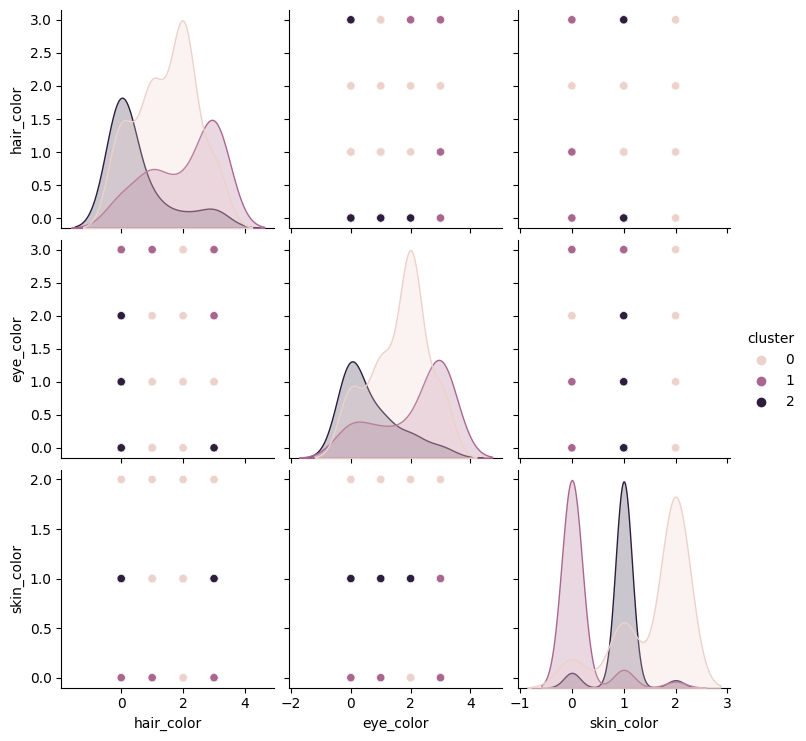

In [71]:
import seaborn as sns
sns.pairplot(data, hue='cluster', diag_kind='kde')
plt.show()